In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [84]:
data = sns.load_dataset('mpg')
print(data.head())
data.info()

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [85]:
data = data.dropna()
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [86]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'origin']
X = data[features]
y = data['mpg']

X.head()

,cylinders,displacement,horsepower,weight,acceleration,origin
0,8,307.0,130.0,3504,12.0,usa
1,8,350.0,165.0,3693,11.5,usa
2,8,318.0,150.0,3436,11.0,usa
3,8,304.0,150.0,3433,12.0,usa
4,8,302.0,140.0,3449,10.5,usa


In [87]:
X_encoded = pd.get_dummies(X,columns=['origin'], drop_first=True)
X_encoded.head()

,cylinders,displacement,horsepower,weight,acceleration,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,False,True
1,8,350.0,165.0,3693,11.5,False,True
2,8,318.0,150.0,3436,11.0,False,True
3,8,304.0,150.0,3433,12.0,False,True
4,8,302.0,140.0,3449,10.5,False,True


In [88]:
X_train, x_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.2,random_state=42)

In [89]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(x_test)

In [90]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_pred,y_pred))
r2 = r2_score(y_test,y_pred)
adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(f"\nLinear Model: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}, Adjusted R²={adj_r2:.2f}")


Linear Model: MAE=3.35, MSE=17.45, RMSE=0.00, R²=0.66, Adjusted R²=0.62


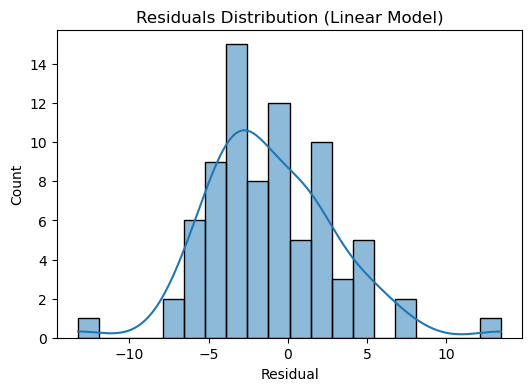

In [91]:
# ## 6. Residual Plot (Linear Model)
plt.figure(figsize=(6,4))
sns.histplot(y_test - y_pred, bins=20, kde=True)
plt.title('Residuals Distribution (Linear Model)')
plt.xlabel('Residual')
plt.show()

In [92]:
poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly_train = poly.fit_transform(X_train)
x_poly_test = poly.transform(x_test)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train,y_train)

y_poly_pred = lr_poly.predict(x_poly_test)

In [93]:
# ## 8. Polynomial Model Evaluation
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_poly_pred))
r2_poly = r2_score(y_test, y_poly_pred)
adj_r2_poly = 1 - (1-r2_poly) * (len(y_test)-1)/(len(y_test)-x_poly_test.shape[1]-1)

print(f"\nPolynomial Model: MAE={mae_poly:.2f}, MSE={mse_poly:.2f}, RMSE={rmse_poly:.2f}, R²={r2_poly:.2f}, Adjusted R²={adj_r2_poly:.2f}")


# Linear Model: MAE=3.35, MSE=17.45, RMSE=4.18, R²=0.66, Adjusted R²=0.62


Polynomial Model: MAE=2.95, MSE=16.69, RMSE=4.08, R²=0.67, Adjusted R²=0.41


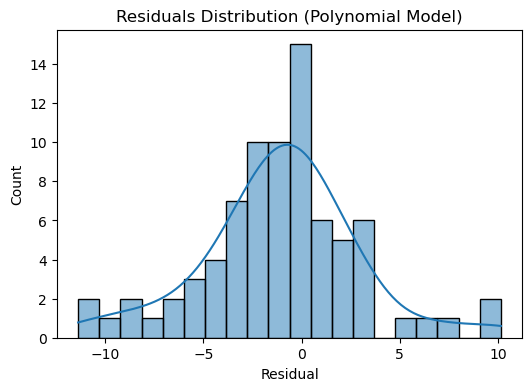

In [94]:
plt.figure(figsize=(6,4))
sns.histplot(y_test - y_poly_pred, bins=20, kde=True)
plt.title('Residuals Distribution (Polynomial Model)')
plt.xlabel('Residual')
plt.show()

In [95]:
coef_names = poly.get_feature_names_out(X_encoded.columns)
coefs_df = pd.DataFrame({'Feature': coef_names,'Coef': lr_poly.coef_})
print("\nTop predictive features (Polynomial Model):")


Top predictive features (Polynomial Model):


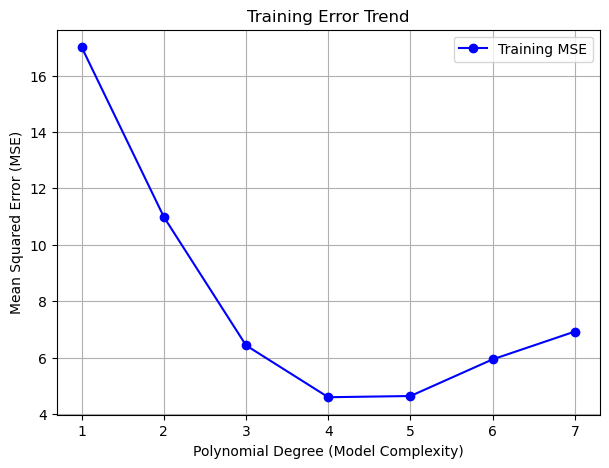

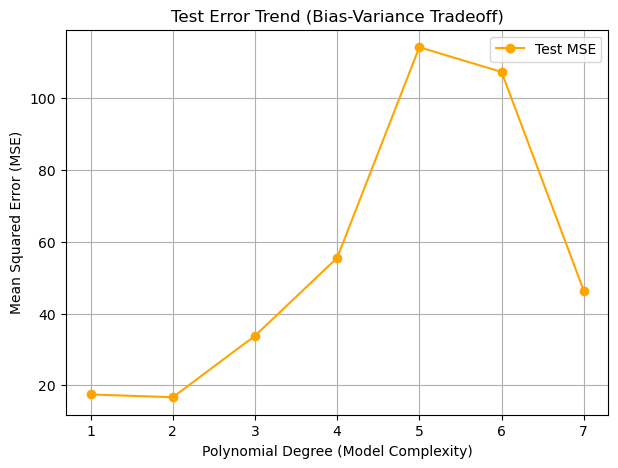

In [ ]:
train_errors = []
test_errors = []
# Loop through polynomial degrees from 1 to 7
for d in range(1, 8):
    # 1. Create Polynomial Features for this degree
    poly = PolynomialFeatures(degree=d, include_bias=False) # Create the feature transformer

    # 2. Transform BOTH training and test data
    X_poly_train = poly.fit_transform(X_train) # Create polynomial features from training data
    X_poly_test = poly.transform(x_test)       # Create the SAME polynomial features from test data

    # 3. Train a Linear Regression Model
    model = LinearRegression()                 # Create a new linear model
    model.fit(X_poly_train, y_train)           # Train it on the POLYNOMIAL training data

    # 4. Calculate Training Error
    y_train_pred = model.predict(X_poly_train) # Predict on the training data it just saw
    train_mse = mean_squared_error(y_train, y_train_pred) # Calculate MSE for training data
    train_errors.append(train_mse)             # Store the training MSE

    # 5. Calculate Test Error
    y_test_pred = model.predict(X_poly_test)   # Predict on the UNSEEN test data
    test_mse = mean_squared_error(y_test, y_test_pred)     # Calculate MSE for test data
    test_errors.append(test_mse)               # Store the test MSE

# --- Plotting the Results Separately ---

# Plot 1: Training MSE vs. Polynomial Degree
plt.figure(figsize=(7, 5)) # Set the figure size
plt.plot(range(1, 8), train_errors, marker='o', label='Training MSE', color='blue') # Blue line
plt.xlabel("Polynomial Degree (Model Complexity)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Training Error Trend")
plt.xticks(range(1, 8))
plt.grid(True)
plt.legend()
plt.show()              # Display the first plot

# Plot 2: Test MSE vs. Polynomial Degree
plt.figure(figsize=(7, 5)) # Set the figure size
plt.plot(range(1, 8), test_errors, marker='o', label='Test MSE', color='orange') # Orange line
plt.xlabel("Polynomial Degree (Model Complexity)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Test Error Trend (Bias-Variance Tradeoff)")
plt.xticks(range(1, 8))
plt.grid(True)
plt.legend()
plt.show()              # Display the second plot